Regresion Lineal

Juan David Meza
Grupo 1704

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
# carga y lectura de los datasets
car_data = pd.read_csv('car data.csv')
car_details_dekho = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
car_details_v3 = pd.read_csv('Car details v3.csv')
car_details_v4 = pd.read_csv('Car details v4.csv')

In [5]:
# Resumen de cada DataFrame para ver columnas y tipos de datos
print("Información del DataFrame 1:")
print(car_data.info(), "\n")
print("Información del DataFrame 2:")
print(car_details_dekho.info(), "\n")
print("Información del DataFrame 3:")
print(car_details_v3.info(), "\n")
print("Información del DataFrame 4:")
print(car_details_v4.info(), "\n")

Información del DataFrame 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None 

Información del DataFrame 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   s

In [7]:
# Unimos los archivos si tienen la misma estructura
data = pd.concat([car_data, car_details_dekho, car_details_v3], ignore_index=True)
# Resumen estadístico
print("Descripción estadística de los datos combinados:")
print(data.describe())

Descripción estadística de los datos combinados:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner  \
count   301.000000     301.000000     301.000000     301.000000  301.000000   
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189   
std       2.891554       5.082812       8.644115   38886.883882    0.247915   
min    2003.000000       0.100000       0.320000     500.000000    0.000000   
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000   
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000   
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000   
max    2018.000000      35.000000      92.600000  500000.000000    3.000000   

               year  selling_price     km_driven        seats  
count  12468.000000   1.246800e+04  1.246800e+04  7907.000000  
mean    2013.555743   5.915773e+05  6.856508e+04     5.416719  
std        4.118485   7.377876e+05  5.333721e+0

In [9]:
# renombro las columnas con la misma estructura y diferente nombre
car_data.rename(columns={'Kms_Driven': 'km_driven'}, inplace=True)
car_data.rename(columns={'Car_Name': 'name'}, inplace=True)
car_data.rename(columns={'Fuel_Type': 'fuel'}, inplace=True)

In [11]:
# Convertir todos los nombres de columna a minúsculas para evitar duplicados
data.columns = data.columns.str.lower()

# Eliminar columnas duplicadas después de estandarizar
data = data.loc[:, ~data.columns.duplicated()]

# Verificar los nombres de las columnas después de la limpieza
print("Columnas después de la estandarización y eliminación de duplicados:\n", data.columns)

Columnas después de la estandarización y eliminación de duplicados:
 Index(['car_name', 'year', 'selling_price', 'present_price', 'kms_driven',
       'fuel_type', 'seller_type', 'transmission', 'owner', 'name',
       'km_driven', 'fuel', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


In [13]:
# Identificar y codificar variables categóricas
categorical_columns = data.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

# Convertir las variables categóricas a variables dummy (binarias)
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Verificar que todas las columnas son numéricas
print("Tipos de datos después de la codificación:\n", data.dtypes)

Columnas categóricas: Index(['car_name', 'fuel_type', 'seller_type', 'transmission', 'name', 'fuel',
       'mileage', 'engine', 'max_power', 'torque'],
      dtype='object')
Tipos de datos después de la codificación:
 year                       float64
selling_price              float64
present_price              float64
kms_driven                 float64
owner                      float64
                            ...   
torque_99.04Nm@ 4500rpm       bool
torque_99.07Nm@ 4500rpm       bool
torque_99.1Nm@ 4500rpm        bool
torque_99.8Nm@ 2700rpm        bool
torque_99Nm@ 4500rpm          bool
Length: 3895, dtype: object


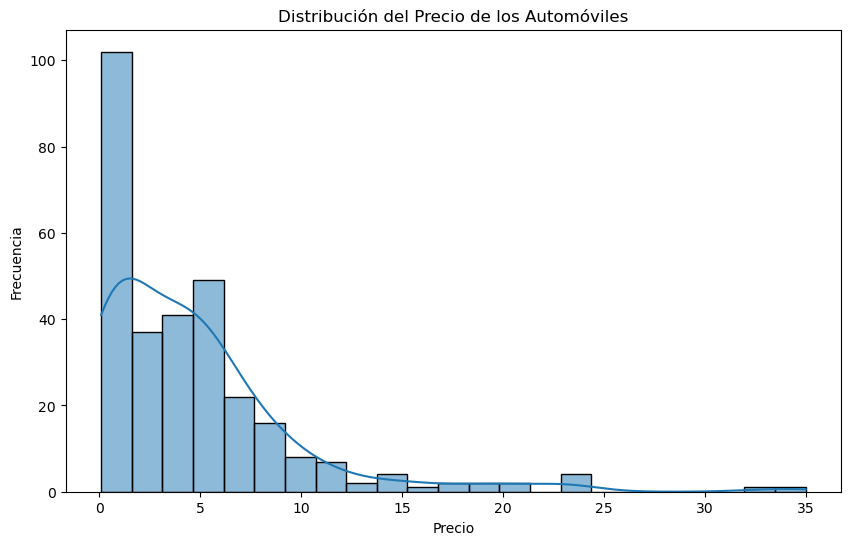

In [15]:
# Distribución de la variable objetivo (por ejemplo, 'price')
plt.figure(figsize=(10, 6))
sns.histplot(data['selling_price'], kde=True)
plt.title("Distribución del Precio de los Automóviles")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

In [17]:
# Imputación de valores faltantes en columnas numéricas
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Imputación de valores faltantes en columnas categóricas
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verificar los valores faltantes restantes
print("Valores faltantes por columna después de la imputación:\n", data.isnull().sum())

Valores faltantes por columna después de la imputación:
 year                       0
selling_price              0
present_price              0
kms_driven                 0
owner                      0
                          ..
torque_99.04Nm@ 4500rpm    0
torque_99.07Nm@ 4500rpm    0
torque_99.1Nm@ 4500rpm     0
torque_99.8Nm@ 2700rpm     0
torque_99Nm@ 4500rpm       0
Length: 3895, dtype: int64


In [19]:
number_cols = data.select_dtypes(include=['float64', 'int64']).columns
print(f"Numeric Columns : {number_cols}")
categorical_cols = data.select_dtypes(include=['object','category']).columns
print(f"Categorical Columns : {categorical_cols}")

Numeric Columns : Index(['year', 'selling_price', 'present_price', 'kms_driven', 'owner',
       'km_driven', 'seats'],
      dtype='object')
Categorical Columns : Index([], dtype='object')


Correlation Matrix : {'year': {'year': 1.0, 'selling_price': 0.2, 'present_price': -0.06, 'kms_driven': -0.53, 'owner': -0.2, 'km_driven': 0.0, 'seats': 0.01}, 'selling_price': {'year': 0.2, 'selling_price': 1.0, 'present_price': 0.88, 'kms_driven': 0.05, 'owner': -0.05, 'km_driven': -0.0, 'seats': -0.01}, 'present_price': {'year': -0.06, 'selling_price': 0.88, 'present_price': 1.0, 'kms_driven': 0.22, 'owner': 0.03, 'km_driven': -0.0, 'seats': -0.01}, 'kms_driven': {'year': -0.53, 'selling_price': 0.05, 'present_price': 0.22, 'kms_driven': 1.0, 'owner': 0.11, 'km_driven': -0.0, 'seats': -0.01}, 'owner': {'year': -0.2, 'selling_price': -0.05, 'present_price': 0.03, 'kms_driven': 0.11, 'owner': 1.0, 'km_driven': -0.0, 'seats': -0.01}, 'km_driven': {'year': 0.0, 'selling_price': -0.0, 'present_price': -0.0, 'kms_driven': -0.0, 'owner': -0.0, 'km_driven': 1.0, 'seats': 0.19}, 'seats': {'year': 0.01, 'selling_price': -0.01, 'present_price': -0.01, 'kms_driven': -0.01, 'owner': -0.01, 'km_d

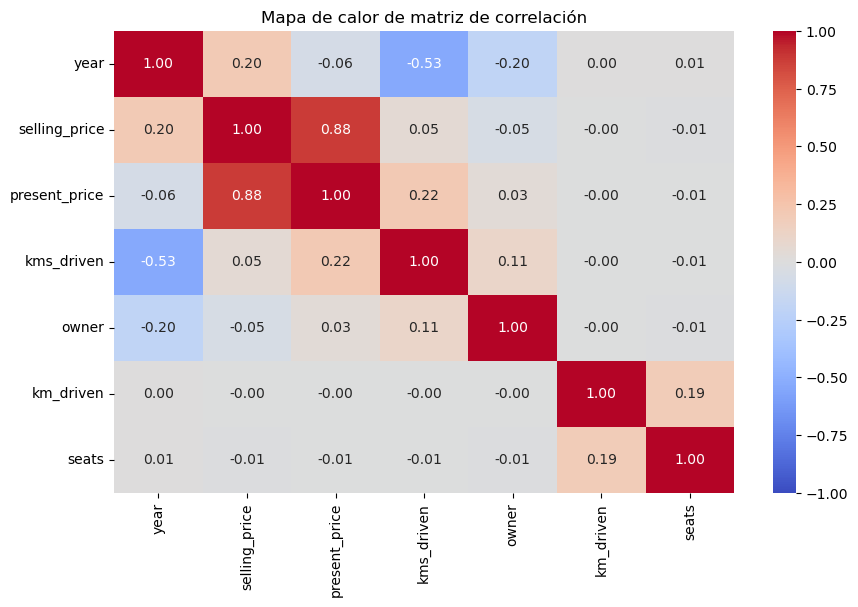

In [21]:
#Obtener matriz de correlación a partir de columnas numéricas
num_cols = len(number_cols)
corr_matrix = {col : {col : 0 for col in number_cols} for col in number_cols}

for i in range(num_cols):
    for j in range(i, num_cols):
        col1 = number_cols[i]
        col2 = number_cols[j]

        mean1 = data[col1].mean()
        mean2 = data[col2].mean()

        covariance = ((data[col1] - mean1) * (data[col2] - mean2)).mean()

        std_dev1 = data[col1].std()
        std_dev2 = data[col2].std()

        correlation = round(covariance / (std_dev1 * std_dev2), 2)

        corr_matrix[col1][col2] = correlation
        corr_matrix[col2][col1] = correlation

print(f"Correlation Matrix : {corr_matrix}")

#Trazado del mapa de calor de la matriz de correlación
corr_matrix2 = data.select_dtypes(include = ['float64', 'int64']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix2, annot = True, fmt = '.2f', cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0)
plt.title("Mapa de calor de matriz de correlación")
plt.show()

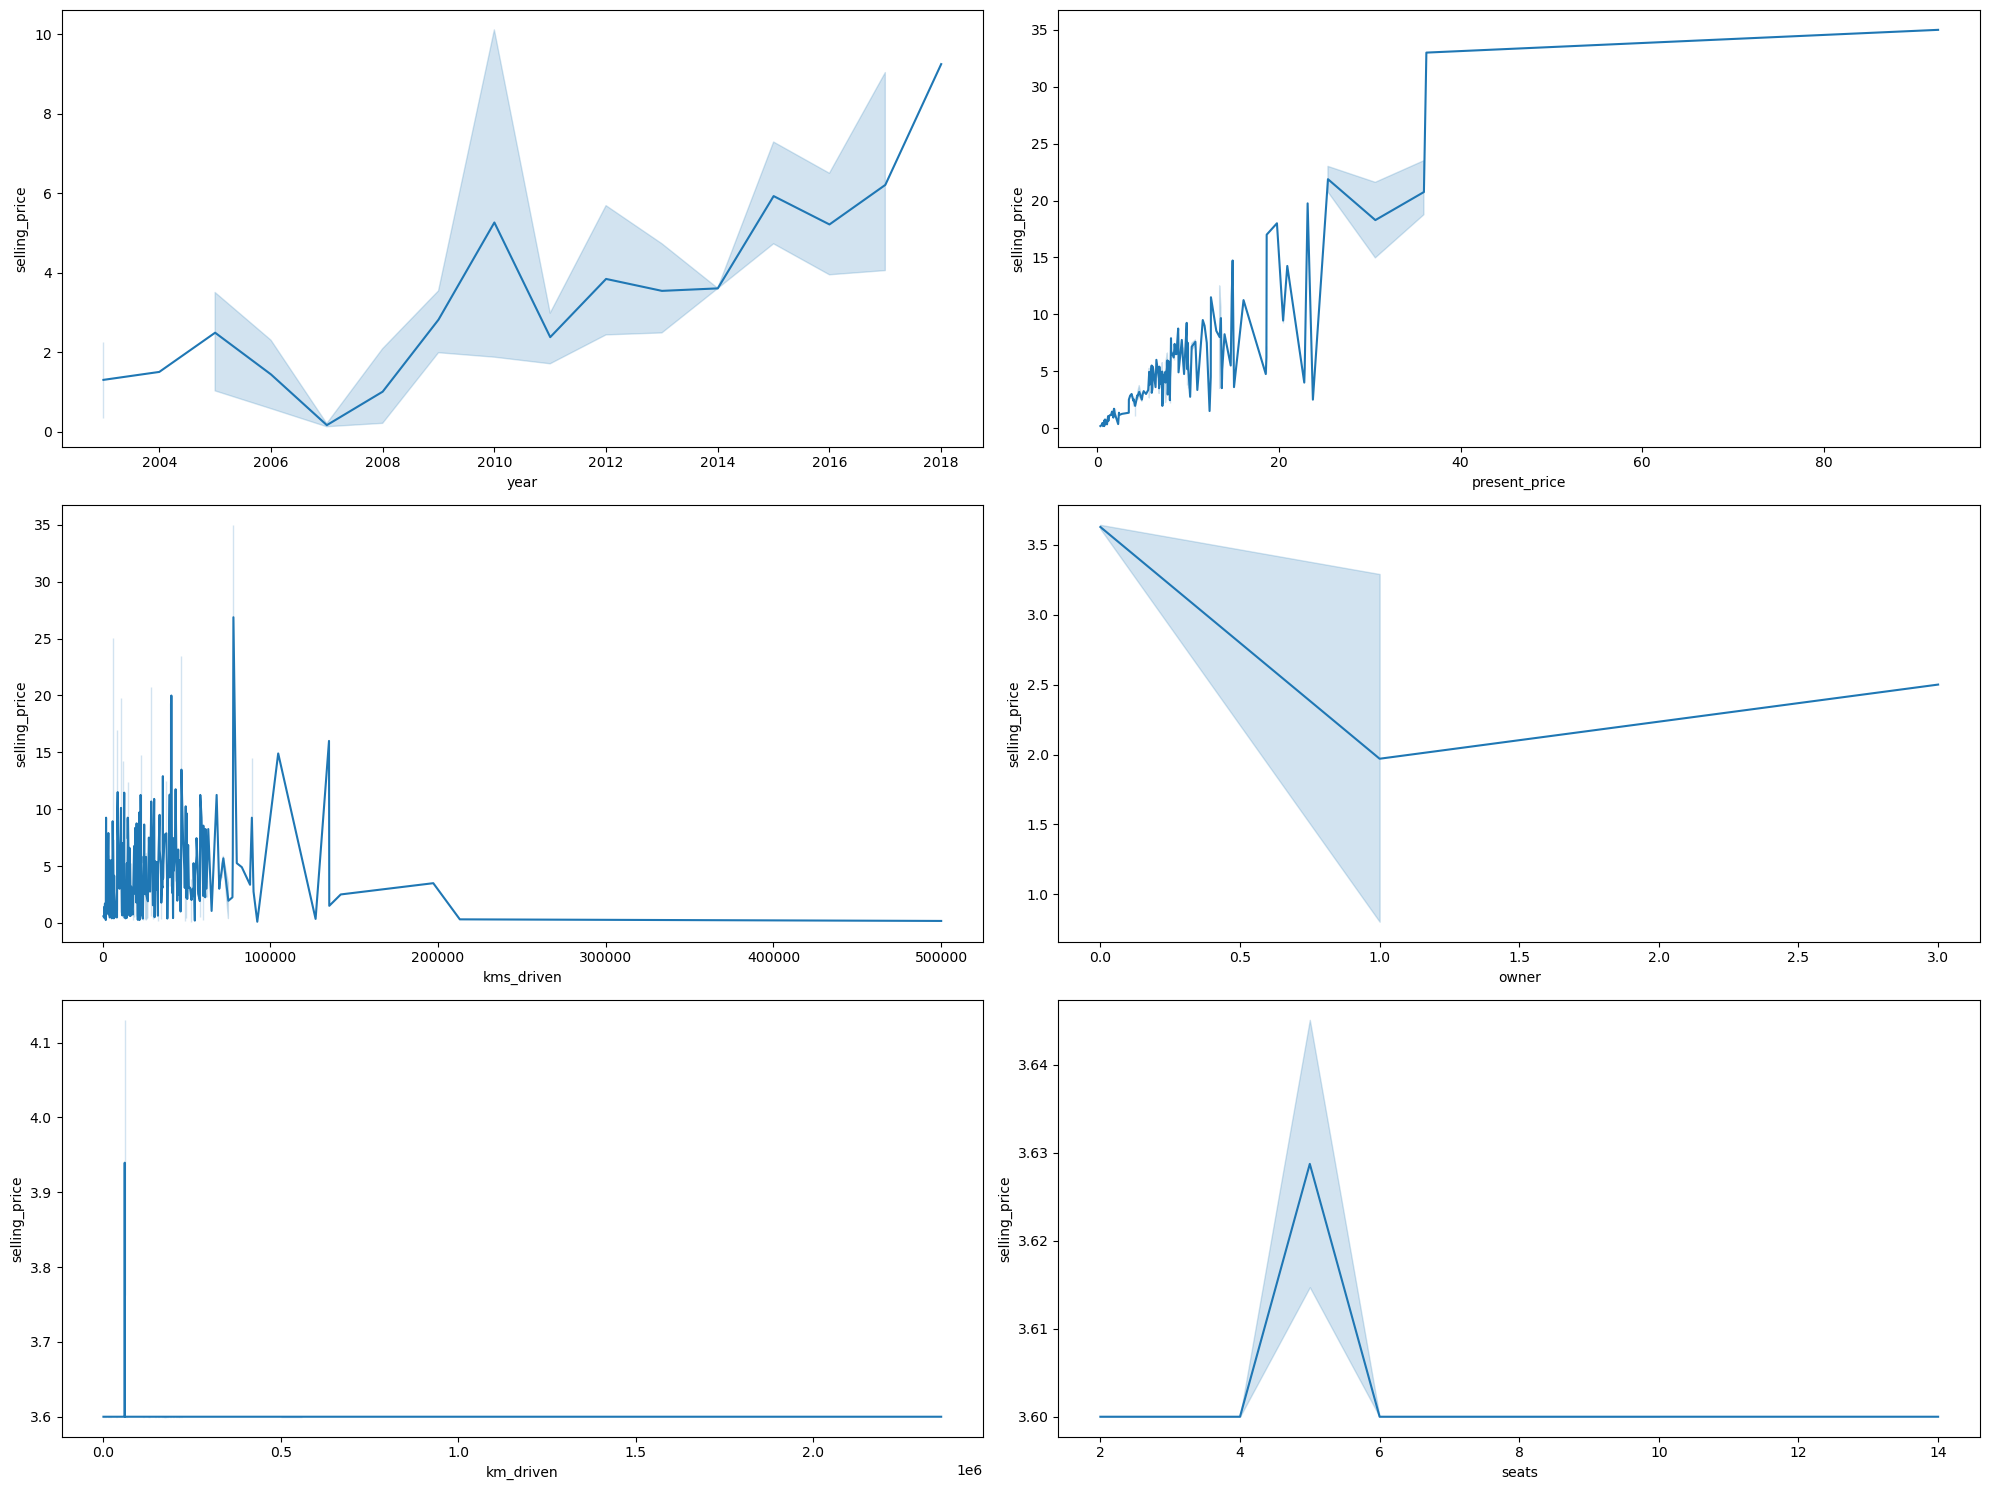

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear subgráficos dinámicamente según el número de columnas
num_features = len(cols)
rows = (num_features + 1) // 2  # Calcular el número de filas necesarias
f, axes = plt.subplots(rows, 2, figsize=(20, 5 * rows))

j, k = 0, 0
for i, col in enumerate(cols):
    sns.lineplot(x=col, y="selling_price", data=data, ax=axes[j, k])
    k += 1
    if k == 2:  # Pasar a la siguiente fila después de cada 2 gráficos
        j += 1
        k = 0

plt.tight_layout()
plt.show()

In [29]:
# Identificar y tratar valores faltantes
missing_data = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_data)

# Imputación de valores faltantes si es necesario
data.fillna(data.mean(), inplace=True)

# Codificación de variables categóricas
data = pd.get_dummies(data, drop_first=True)

# Normalización de las variables numéricas (si se requiere)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

Valores faltantes por columna:
 year                       0
selling_price              0
present_price              0
kms_driven                 0
owner                      0
                          ..
torque_99.04Nm@ 4500rpm    0
torque_99.07Nm@ 4500rpm    0
torque_99.1Nm@ 4500rpm     0
torque_99.8Nm@ 2700rpm     0
torque_99Nm@ 4500rpm       0
Length: 3895, dtype: int64


In [31]:
# Filtrar solo las columnas numéricas para la matriz de correlación
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Verificar si 'selling_price' está en los datos numéricos
if 'selling_price' in numeric_data.columns:
    # Calcular la matriz de correlación con respecto a 'selling_price'
    correlation_matrix = numeric_data.corr()
    cor_target = abs(correlation_matrix["selling_price"])

    # Seleccionar características con alta correlación (mayor a 0.2)
    relevant_features = cor_target[cor_target > 0.2]
    print("Características relevantes:\n", relevant_features)

    # Filtrar el dataset con solo las características relevantes
    selected_features = relevant_features.index
    data = data[selected_features]
else:
    print("La columna 'selling_price' no se encuentra en los datos numéricos.")

# Verificar el dataset final
data.head()

Características relevantes:
 year             0.203829
selling_price    1.000000
present_price    0.880592
Name: selling_price, dtype: float64


,year,selling_price,present_price
0,0.019631,-0.345694,-0.627022
1,-2.218533,1.414091,2.325136
2,6.734125,4.556564,2.556825
3,-6.694862,-0.974189,-1.703252
4,0.019631,1.225543,0.329626


In [33]:
# Separar las características (X) de la variable objetivo (y)
X = data.drop("selling_price", axis=1)
y = data["selling_price"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (8938, 2)
Tamaño del conjunto de prueba: (3831, 2)


In [35]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = linear_model.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Medio Absoluto (MAE):", mae)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

Error Medio Absoluto (MAE): 0.057948382868226095
Error Cuadrático Medio (MSE): 0.14418110877134893
Coeficiente de Determinación (R^2): 0.8524781649254018


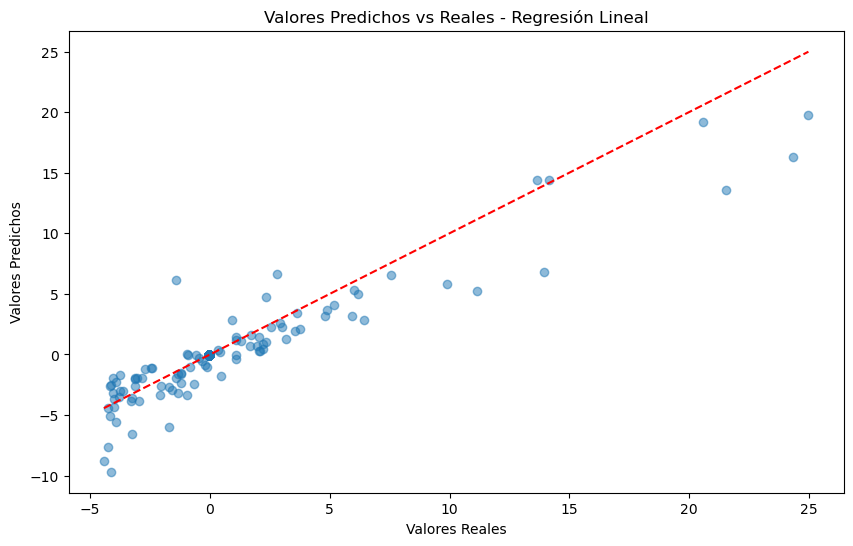

In [39]:
import matplotlib.pyplot as plt

# Comparación de valores predichos y reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Predichos vs Reales - Regresión Lineal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

Descripción de los Resultados del Modelo

Los resultados obtenidos del modelo de regresión lineal son los siguientes:
Error Medio Absoluto (MAE): 0.0579
Error Cuadrático Medio (MSE): 0.1442
Coeficiente de Determinación (R²): 0.8525

Interpretación:
MAE indica que, en promedio, la predicción del precio de venta del vehículo se desvía aproximadamente 0.0579 unidades de la realidad, lo que sugiere una buena precisión en las predicciones.

MSE resalta que el cuadrado de los errores en las predicciones es relativamente bajo, lo que también sugiere que el modelo se ajusta bien a los datos.

R² cercano a 0.85 implica que aproximadamente el 85.25% de la variabilidad en el precio de venta se explica por las características utilizadas en el modelo, lo que es un indicativo de un modelo robusto.

Análisis de las Características Relevantes
Durante el proceso de análisis exploratorio y la selección de características, se identificaron varias variables que tienen una correlación significativa con el selling_price. Entre ellas, se pueden incluir:

Present_Price: A medida que aumenta el precio presente, el precio de venta del vehículo también tiende a aumentar.

Year: Los vehículos más nuevos tienden a tener precios de venta más altos.

km_driven: Aunque la relación puede no ser lineal, se espera que un menor kilometraje esté correlacionado con un precio de venta más alto.

Owner: Menor número de propietarios puede estar correlacionado con un mayor precio de venta.